# Tools for exercises

Some tools and utils for the exercise.


In [1]:
import numpy as np
import skimage
import skimage.data
import skimage.io
import skimage.future
import skimage.segmentation
import skimage.feature
import sklearn.cluster
import cv2

# for displaying images in jupyter
from matplotlib import pyplot as plt

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
#mpl.rcParams['figure.dpi']= 400

## Grayscale images

Convert image to grayscale and back to uint8

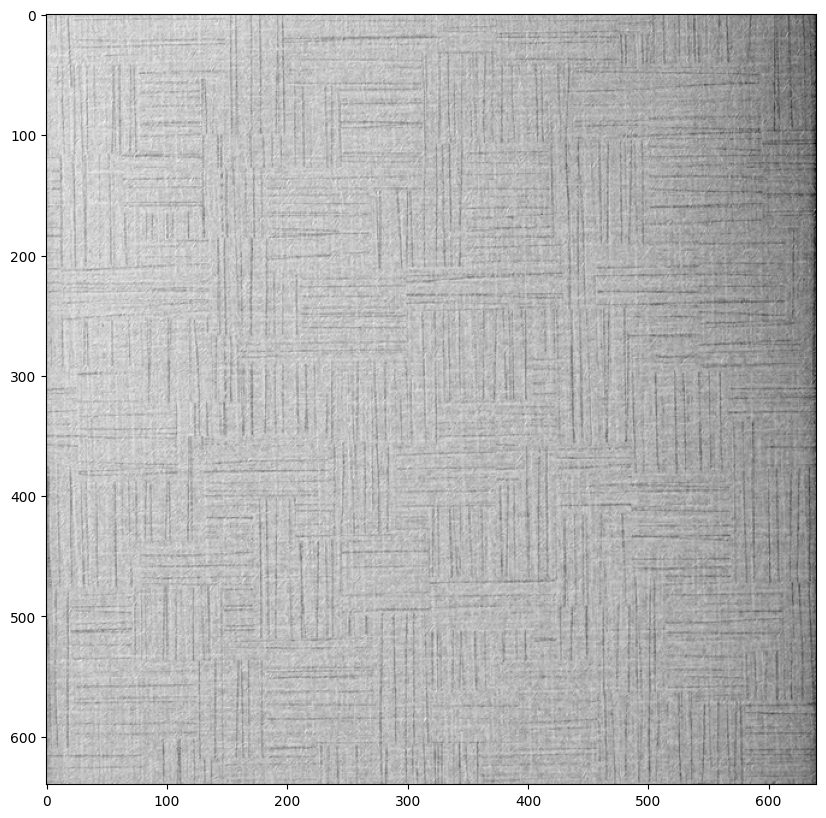

In [4]:
im_1 = skimage.io.imread('images/crosshatched_0044.jpg')
im_1_gray = skimage.img_as_ubyte(skimage.color.rgb2gray(im_1))
plt.imshow(im_1_gray, cmap='gray')

### Sliding Windows


For a sliding window approach, skimage provides two utility function to calculate blocks from an image. One is ```skimage.util.view_as_blocks``` that divides the image into non-overlapping blocks and the other is ```skimage.util.view_as_windows``` that divides the image into overlapping windows. For the latter approach, we have to be careful to not generate too many windows, so in the sliding window approach we often use some step value greater than 1.


(8, 8, 80, 80)


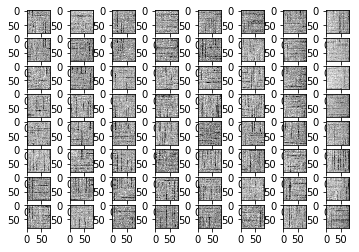

In [4]:
blocks_1 = skimage.util.shape.view_as_blocks(im_1_gray, block_shape=(80,80))
print(blocks_1.shape)

index = 1
for i in range(blocks_1.shape[0]):
    for j in range(blocks_1.shape[1]):
        plt.subplot(blocks_1.shape[0], blocks_1.shape[1], index)
        plt.imshow(blocks_1[i,j], cmap='gray')
        index += 1

### Histogram calculation and plotting




array([    2,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     2,     0,     0,
           1,     0,     0,     2,     0,     0,     2,     0,     0,
           4,     0,     0,     0,     3,     0,     0,     5,     0,
           0,     7,     0,     0,    14,     0,     0,    16,     0,
           0,    32,     0,     0,    30,     0,     0,    29,     0,
           0,    38,     0,     0,     0,    33,     0,     0,    33,
           0,     0,    49,     0,     0,    49,     0,     0,    73,
           0,     0,    95,     0,     0,   101,     0,     0,   149,
           0,     0,   152,     0,     0,     0,   185,     0,     0,
         243,     0,     0,   292,     0,     0,   333,     0,     0,
         410,     0,     0,   522,     0,     0,   640,     0,     0,
         795,     0,     0,  1024,     0,     0,     0,  1213,     0,
           0,  1514,     0,     0,  1801,     0,     0,  2264,     0,
           0,  2534,

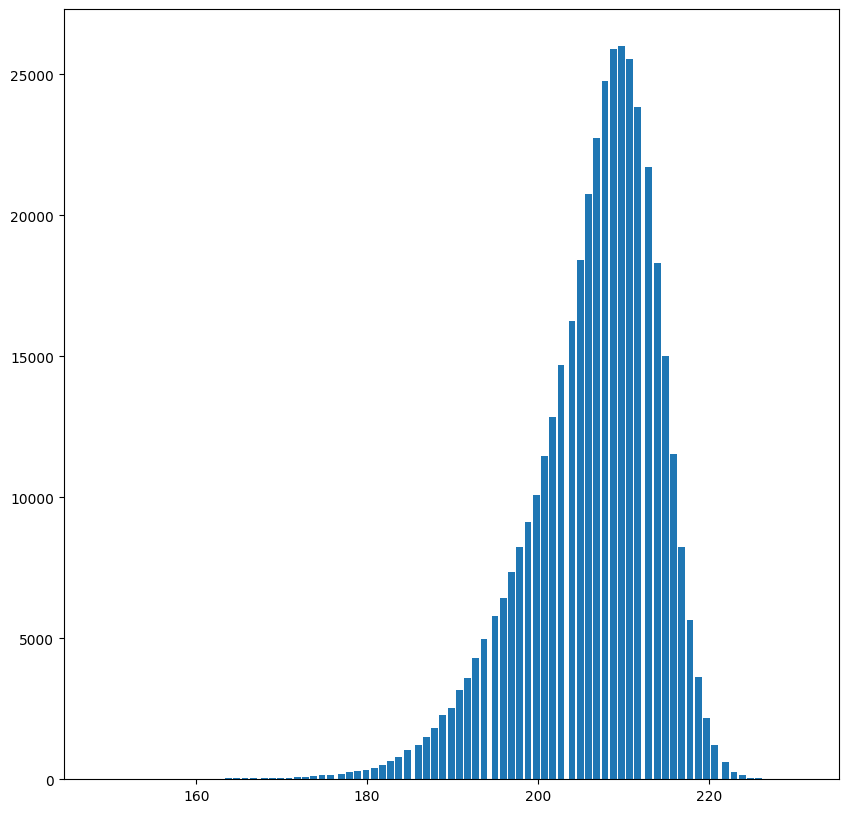

In [7]:
hist, bins = np.histogram(im_1_gray, bins=255)
plt.bar(bins[:-1], hist)